>> Amr Abdelaziz Attia Mohamed 7447

# Notebook 1 

# Face detection 

Some needed imports

In [66]:
import zipfile
import os
import numpy as np
from IPython.display import Image, display
from PIL import Image as PIL_Image
import cv2
import matplotlib.pyplot as plt

- Reading the dataset from a zip file

- Extract the dataset 

In [67]:
# Path to the uploaded archive file
zip_path = 'archive.zip'

# Directory where the contents will be extracted
extract_dir = 'extracted_data'

# Create the extract directory if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Extract the contents of the archive file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List the extracted files and folders
extracted_files = os.listdir('extracted_data/105_classes_pins_dataset/')
print("Count of folders is: " ,len(extracted_files))
print("Extracted files and folders:")
print(extracted_files)

Count of folders is:  105
Extracted files and folders:
['pins_Adriana Lima', 'pins_Alex Lawther', 'pins_Alexandra Daddario', 'pins_Alvaro Morte', 'pins_alycia dabnem carey', 'pins_Amanda Crew', 'pins_amber heard', 'pins_Andy Samberg', 'pins_Anne Hathaway', 'pins_Anthony Mackie', 'pins_Avril Lavigne', 'pins_barack obama', 'pins_barbara palvin', 'pins_Ben Affleck', 'pins_Bill Gates', 'pins_Bobby Morley', 'pins_Brenton Thwaites', 'pins_Brian J. Smith', 'pins_Brie Larson', 'pins_camila mendes', 'pins_Chris Evans', 'pins_Chris Hemsworth', 'pins_Chris Pratt', 'pins_Christian Bale', 'pins_Cristiano Ronaldo', 'pins_Danielle Panabaker', 'pins_Dominic Purcell', 'pins_Dwayne Johnson', 'pins_Eliza Taylor', 'pins_Elizabeth Lail', 'pins_elizabeth olsen', 'pins_ellen page', 'pins_elon musk', 'pins_Emilia Clarke', 'pins_Emma Stone', 'pins_Emma Watson', 'pins_gal gadot', 'pins_grant gustin', 'pins_Gwyneth Paltrow', 'pins_Henry Cavil', 'pins_Hugh Jackman', 'pins_Inbar Lavi', 'pins_Irina Shayk', 'pins_Ja

Reading the weights file path and config file path

In [68]:
weights_path = "opencv_face_detector_uint8.pb"
config_path = "opencv_face_detector.pbtxt"
print(os.path.exists(weights_path))  
print(os.path.exists(config_path))

True
True


Implement the model usiing the weights and config files

In [69]:
try:
    net = cv2.dnn.readNetFromTensorflow(weights_path,config_path)
    print("Model loaded successfully.")
except cv2.error as e:
    print("Error loading model:", e)

Model loaded successfully.


Creating a function that make camera activate and help me take a live capture

In [70]:
def take_photo():
    # Initialize the webcam (0 is the default webcam)
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        raise Exception("Could not open video device")

    # Set the resolution for the video capture
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

    # Capture one frame from the webcam
    ret, frame = cap.read()

    if not ret:
        raise Exception("Failed to capture image")

    # Save the captured frame to a file
    filename = "captured_image.jpg"
    cv2.imwrite(filename, frame)

    # Release the webcam
    cap.release()

    return filename

Create a function that detect the face location in the image

In [71]:
# Function to perform face detection on a static photo
def detect_faces(net, frame):
    # Perform face detection
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), [104., 177., 123.], False, False)
    net.setInput(blob)
    detections = net.forward()

    # Process the detections
    for i in range(0, detections.shape[2]):
        # Get the confidence (probability) of the current detection:
        confidence = detections[0, 0, i, 2]
        # Only consider detections if confidence is greater than a fixed minimum confidence:
        if confidence > 0.7:
            # Get the coordinates of the current detection:
            box = detections[0, 0, i, 3:7] * np.array([frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]])
            (startX, startY, endX, endY) = box.astype("int")
            # Draw the detection and the confidence:
            text = "{:.3f}%".format(confidence * 100)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.rectangle(frame, (startX, startY), (endX, endY), (255, 0, 0), 3)
            cv2.putText(frame, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the result using matplotlib
    plt.imshow(frame)  # Convert from BGR to RGB
    plt.axis('off')  # Turn off axis
    plt.show()


Try the detect function on a static image

Saved to obama.jpg


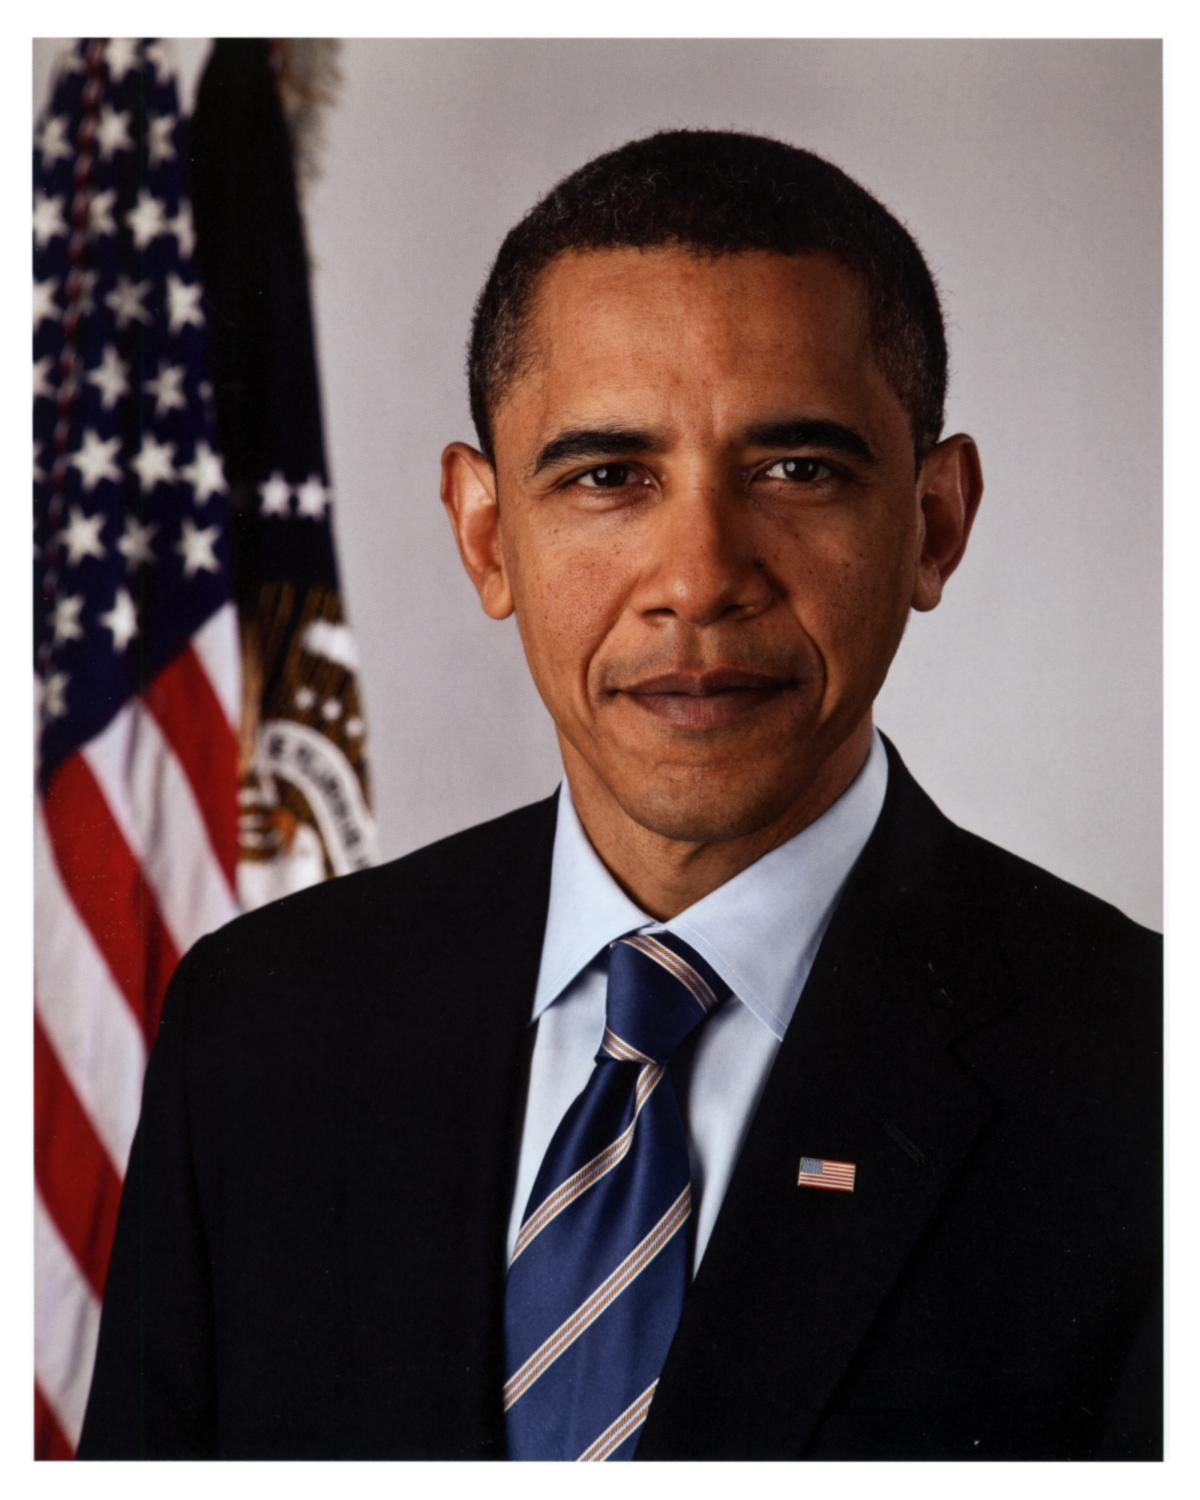

In [ ]:
try:
    # reading static image
    filename = 'obama.jpg'
    print('Saved to {}'.format(filename))

    # Load the image using PIL
    img_pil = PIL_Image.open(filename)

    # Convert PIL Image to NumPy array (if needed for processing with OpenCV)
    img_np = np.array(img_pil)

    # Show the image which was just taken.
    display(Image(filename))

except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

Detect the face location

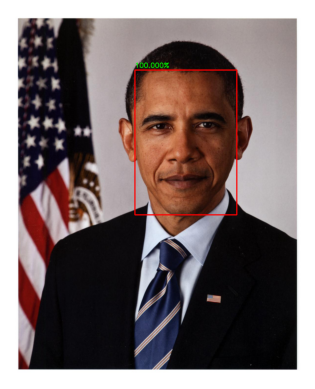

In [83]:
detect_faces(net, img_np)

Try the detect image using live camera feed

Saved to captured_image.jpg


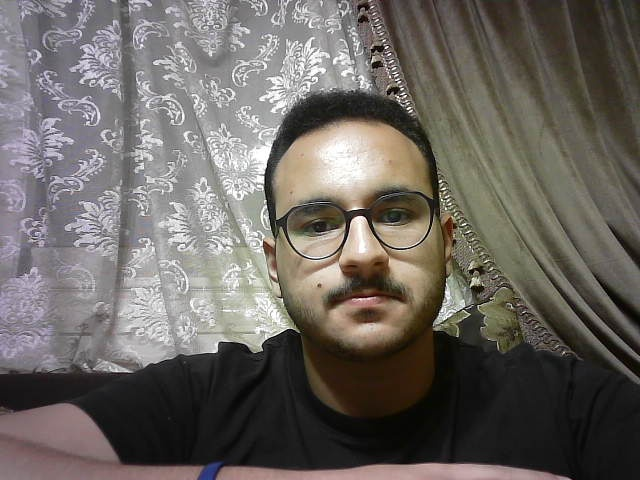

In [72]:
try:
    # Capture the photo
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Load the image using PIL
    img_pil = PIL_Image.open(filename)

    # Convert PIL Image to NumPy array (if needed for processing with OpenCV)
    img_np = np.array(img_pil)

    # Show the image which was just taken.
    display(Image(filename))

except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

Detect the face location

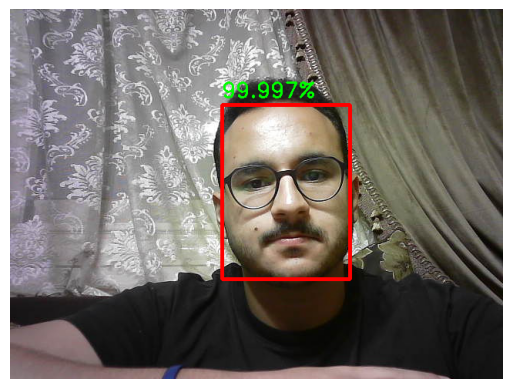

In [73]:
detect_faces(net, img_np)

# Cropping the face

creating a function that detect the face location then crop it from the image

In [76]:
def detect_and_crop_face(image, conf_threshold=0.5):
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    net.setInput(blob)
    detections = net.forward()

    faces = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            face = image[startY:endY, startX:endX]
            faces.append(face)
    return faces

- Defining the path of:
    - Dataset containg the images that will be cropped
    - Where will be the cropped images saved

In [77]:
# Path to the directory where cropped images will be saved
output_path = 'cropped_faces'
# Path to the directory containing the extracted dataset images
dataset_path = 'extracted_data/105_classes_pins_dataset'


Looping on all the images and crop the faces and save them in the new location

In [78]:
# Step 3: Process each image and save cropped faces
os.makedirs(output_path, exist_ok=True)

# Process each image, detect faces, and save cropped faces in mirrored folder structure
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith((".jpg", ".png")):
            img_path = os.path.join(root, file)
            img = cv2.imread(img_path)
            if img is not None:
                # Detect faces in the image
                faces = detect_and_crop_face(img)
                
                # Create a mirrored directory structure in the output path
                relative_path = os.path.relpath(root, dataset_path)
                output_dir = os.path.join(output_path, relative_path)
                os.makedirs(output_dir, exist_ok=True)
                
                # Save each cropped face in the corresponding output folder
                for i, face in enumerate(faces):
                    face_filename = f"{file.split('.')[0]}_face_{i}.jpg"
                    face_path = os.path.join(output_dir, face_filename)
                    cv2.imwrite(face_path, face)


Trying the detect_and_crop function on the live image we have taken

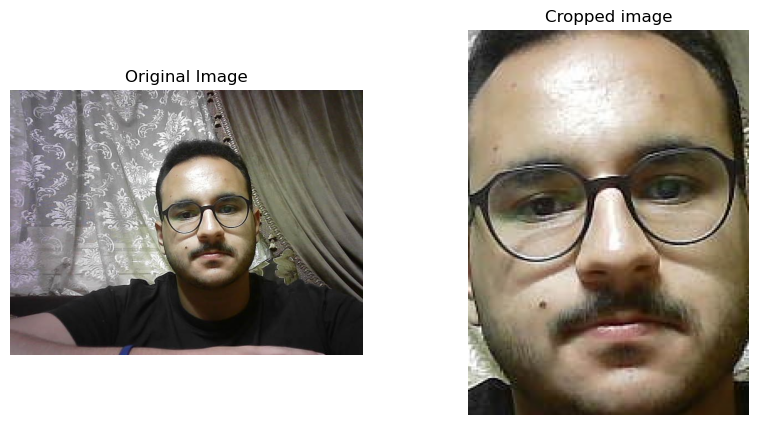

In [79]:
# Path to a test image
test_image_path = "captured_image.jpg"  

# Load and process the test image
img = cv2.imread(test_image_path)
if img is not None:
    # Detect and crop faces
    faces = detect_and_crop_face(img)
    
    # Set up the display
    num_faces = len(faces)
    plt.figure(figsize=(10, 5))
    
    # Display the original image
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.subplot(1, 2, 1)  # Include space for the original image
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Original Image")
    
    # Display each cropped face
    for i, face in enumerate(faces):
        face_rgb = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.subplot(1, 2,  2)  # Start from the second position
        plt.imshow(face_rgb)
        plt.axis('off')
        plt.title("Cropped image")
    
    # Show all images
    plt.show()
else:
    print("Test image not found or failed to load.")

Trying the detect_and_crop function on the static image

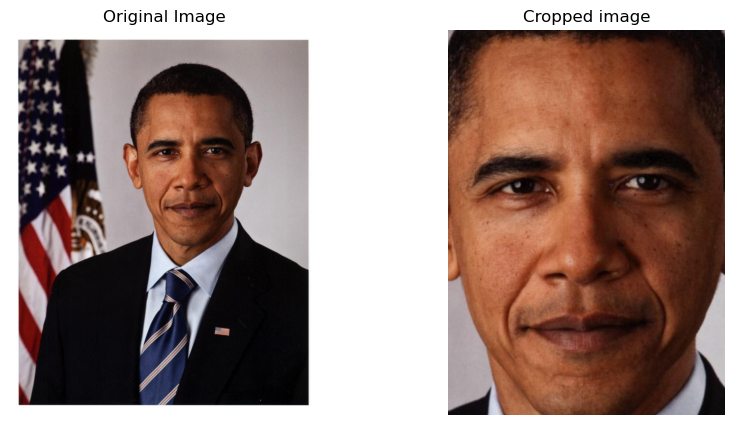

In [80]:
# Path to a test image
test_image_path = "obama.jpg"  

# Load and process the test image
img = cv2.imread(test_image_path)
if img is not None:
    # Detect and crop faces
    faces = detect_and_crop_face(img)
    
    # Set up the display
    num_faces = len(faces)
    plt.figure(figsize=(10, 5))
    
    # Display the original image
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.subplot(1, 2, 1)  # Include space for the original image
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Original Image")
    
    # Display each cropped face
    for i, face in enumerate(faces):
        face_rgb = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.subplot(1, 2,  2)  # Start from the second position
        plt.imshow(face_rgb)
        plt.axis('off')
        plt.title("Cropped image")
    
    # Show all images
    plt.show()
else:
    print("Test image not found or failed to load.")

Saving the dataset cropped as a ZIP file again

In [81]:
zip_output_path = 'cropped_faces.zip' 
with zipfile.ZipFile(zip_output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, _, files in os.walk(output_path):
        for file in files:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, output_path)
            zipf.write(file_path, arcname)
